# Exam - Part 3
---

@ Pranjal Pathak


# 1. Imports

In [1]:
# Standard Imports
# python 3.11.1 (stable release)

import os
import sys
import numpy as np
import pandas as pd

import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, BatchNormalization, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import RMSprop, Adagrad, SGD, Adam
from keras.utils import to_categorical

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

2023-12-09 16:13:31.356569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Datset

In [2]:
# dataset stored locally

df = pd.read_csv("./Final_News_DF_Labeled_ExamDataset.csv")

# shuffling data
df = shuffle(df).reset_index(drop=True)

df.shape

(1493, 301)

In [3]:
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Analysis

In [4]:
vocab = list(np.unique(df.columns[df.columns!='LABEL'].astype(str)))

print(f"Total Vocab length: {len(vocab)}")

Total Vocab length: 300


In [5]:
vocab[:5]

['according', 'agency', 'ahead', 'alabama', 'amazon']

In [6]:
# 1st Article

In [7]:
article_1 = dict(zip(df.columns[df.columns!='LABEL'].astype(str), df.iloc[0:1,1:].values.ravel()))

text = " ".join([k for k,v in article_1.items() if int(v)!=0])
print(f"First cleaned article is:\n\n \'{text}\'")

First cleaned article is:

 'human published research world'


In [8]:
article_2 = dict(zip(df.columns[df.columns!='LABEL'].astype(str), df.iloc[1:2,1:].values.ravel()))

text = " ".join([k for k,v in article_2.items() if int(v)!=0])
print(f"Second cleaned article is:\n\n \'{text}\'")

Second cleaned article is:

 'culture good international news sports thanksgiving year'


<Axes: xlabel='LABEL', ylabel='Count'>

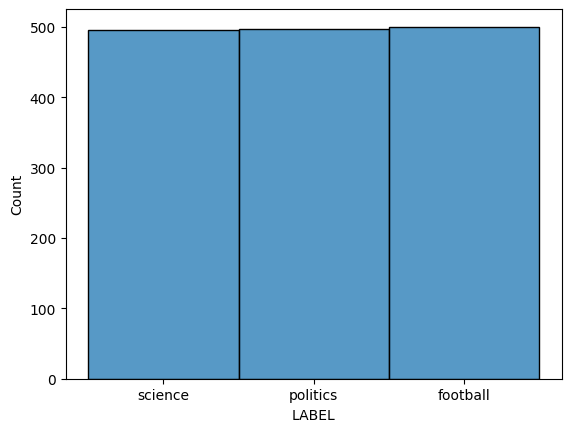

In [9]:
sns.histplot(df.LABEL)

In [10]:
# any missing values ?

df.iloc[:,1:].isna().sum().sum()

0

- 300 unique words
- first column is target/label, 3 labels.
- responses are balanced so no need for re-sampling techniques
- no missing values
- Seems to be count-vectorized, values represent the count of words for every article.

# 4. Data Prep

In [11]:
# Data split

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:], df['LABEL'], test_size=0.2, random_state=7)

#### Prep: Training Data

In [12]:
# converting to array

X_train  = np.array(X_train)
X_test   = np.array(X_test)

print("Array Format:\n")
X_train

Array Format:



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
# # normalization
# # does not improve on results

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print("Normalized Array Format:\n")
# X_train

In [14]:
X_train[0:1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
X_test[0:1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
print(f"Final X_train: {X_train.shape}")
print(f"Final X_test: {X_test.shape}")

Final X_train: (1194, 300)
Final X_test: (299, 300)


#### Prep: Target Labels

In [17]:
# converting to array

Y_train  = Y_train.values.ravel()
Y_test   = Y_test.values.ravel()

print("Array Format:\n")
Y_train

Array Format:



array(['science', 'football', 'science', ..., 'football', 'politics',
       'politics'], dtype=object)

In [18]:
# encoding topics to integers

label_encoder  = LabelEncoder()
Y_train_enc    = label_encoder.fit_transform(Y_train)
Y_test_enc     = label_encoder.transform(Y_test)

print(label_encoder.classes_)

print("\nEncoded Format:")
Y_train_enc

['football' 'politics' 'science']

Encoded Format:


array([2, 0, 2, ..., 0, 1, 1])

In [19]:
# re-shaping to a 1-D array

Y_train_enc    = Y_train_enc.reshape(-1,1)
Y_test_enc     = Y_test_enc.reshape(-1,1)

print("Reshaped 1D Array Format:\n")
Y_train_enc

Reshaped 1D Array Format:



array([[2],
       [0],
       [2],
       ...,
       [0],
       [1],
       [1]])

In [20]:
Y_train_enc[:5]

array([[2],
       [0],
       [2],
       [1],
       [2]])

In [21]:
Y_test_enc[:5]

array([[1],
       [1],
       [2],
       [1],
       [1]])

In [22]:
print(f"Final Y_train: {Y_train_enc.shape}")
print(f"Final Y_test: {Y_test_enc.shape}")

Final Y_train: (1194, 1)
Final Y_test: (299, 1)


# 5. Modelling

#### Categorical Cross Entropy vs Sparse Cross Entropy


`Categorical Cross Entropy`: This is used when labels are one-hot encoded. Respectively, in compilation, metrics is chosen as 'accuracy'



`Sparse Cross Entropy`: This is used when labels are integers or label encoded. Respectively, in compilation, metrics is chosen as 'sparse_categorical_accuracy'

In [23]:
# total count of unique words (max integer index of vocab + 1)
vocab_size = len(vocab)
vocab_size

300

### 1. ANN

In [24]:
###############################
## ANN
###############################

# model definition
ann_model = Sequential()

# architecture
ann_model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=X_train.shape[1]))
ann_model.add(Flatten())
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dropout(.5))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dropout(.5))
ann_model.add(Dense(3, activation='softmax'))

# summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           9600      
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 32)                307232    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0

In [25]:
# Compile ANN
ann_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['sparse_categorical_accuracy'])

# Fit model
ann_history = ann_model.fit(X_train, Y_train_enc, validation_data=(X_test, Y_test_enc), epochs=20)

Epoch 1/20
38/38 [==============================] - 1s 8ms/step - loss: 1.1047 - sparse_categorical_accuracy: 0.3233 - val_loss: 1.0934 - val_sparse_categorical_accuracy: 0.3344
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 1.0761 - sparse_categorical_accuracy: 0.3786 - val_loss: 1.0452 - val_sparse_categorical_accuracy: 0.4080
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 1.0269 - sparse_categorical_accuracy: 0.4464 - val_loss: 0.9858 - val_sparse_categorical_accuracy: 0.5686
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.9765 - sparse_categorical_accuracy: 0.5050 - val_loss: 0.9214 - val_sparse_categorical_accuracy: 0.6488
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.8840 - sparse_categorical_accuracy: 0.5452 - val_loss: 0.8060 - val_sparse_categorical_accuracy: 0.6522
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.8111 - sparse_categorical_accuracy: 

### 2. CNN

In [26]:
###############################
## CNN
###############################

# model definition
cnn_model = Sequential()

# architecture
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X_train.shape[1]))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(64, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

# summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 50)           15000     
                                                                 
 conv1d (Conv1D)             (None, 298, 128)          19328     
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 128)          0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 149, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 64)           24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 73, 64)            0         
 g1D)                                                 

In [27]:
# Compile CNN
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['sparse_categorical_accuracy'])

# Fit model
cnn_history = cnn_model.fit(X_train, Y_train_enc, epochs=20)

Epoch 1/20
38/38 [==============================] - 2s 35ms/step - loss: 1.0618 - sparse_categorical_accuracy: 0.4313
Epoch 2/20
38/38 [==============================] - 1s 33ms/step - loss: 0.7734 - sparse_categorical_accuracy: 0.6407
Epoch 3/20
38/38 [==============================] - 1s 32ms/step - loss: 0.6089 - sparse_categorical_accuracy: 0.7420
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 0.4894 - sparse_categorical_accuracy: 0.7940
Epoch 5/20
38/38 [==============================] - 1s 34ms/step - loss: 0.4054 - sparse_categorical_accuracy: 0.8291
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.3408 - sparse_categorical_accuracy: 0.8451
Epoch 7/20
38/38 [==============================] - 1s 34ms/step - loss: 0.2713 - sparse_categorical_accuracy: 0.8853
Epoch 8/20
38/38 [==============================] - 1s 33ms/step - loss: 0.2358 - sparse_categorical_accuracy: 0.8995
Epoch 9/20
38/38 [==============================] - 1s 3

### 3. LSTM

In [47]:
###############################
## LSTM
###############################

# Model architecture
rnn_model = Sequential()

# architecture
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X_train.shape[1]))
rnn_model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(LSTM(64))
rnn_model.add(BatchNormalization())
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(3, activation='softmax'))

# summary
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 50)           15000     
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          91648     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                      

In [48]:
# Compile LSTM-RNN
rnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['sparse_categorical_accuracy'])

# Fit model
rnn_history = rnn_model.fit(X_train, Y_train_enc, epochs=25, batch_size=32)

Epoch 1/25
38/38 [==============================] - 16s 325ms/step - loss: 1.0803 - sparse_categorical_accuracy: 0.3928
Epoch 2/25
38/38 [==============================] - 14s 377ms/step - loss: 1.0579 - sparse_categorical_accuracy: 0.4338
Epoch 3/25
38/38 [==============================] - 21s 557ms/step - loss: 1.0317 - sparse_categorical_accuracy: 0.4305
Epoch 4/25
38/38 [==============================] - 16s 424ms/step - loss: 1.0423 - sparse_categorical_accuracy: 0.4296
Epoch 5/25
38/38 [==============================] - 16s 430ms/step - loss: 1.0213 - sparse_categorical_accuracy: 0.4749
Epoch 6/25
38/38 [==============================] - 17s 441ms/step - loss: 1.0077 - sparse_categorical_accuracy: 0.4891
Epoch 7/25
38/38 [==============================] - 16s 423ms/step - loss: 1.0122 - sparse_categorical_accuracy: 0.4690
Epoch 8/25
38/38 [==============================] - 16s 432ms/step - loss: 1.0061 - sparse_categorical_accuracy: 0.4941
Epoch 9/25
38/38 [======================

# 6. Performance

In [30]:
def compute_metrics(y_test, y_pred):
    accuracy                  = accuracy_score(y_test, y_pred)
    precision, recall, f1, _  = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    cm                        = confusion_matrix(y_test, y_pred)
    creport                   = classification_report(y_test, y_pred)
    cmd                       = ConfusionMatrixDisplay(cm)
    print(f"~~~ Model Metrics ~~~\
          \n\nAccuracy:\t{round(accuracy*100, 3)} %\
          \nPrecision:\t{round(precision*100, 3)} %\
          \nRecall:\t\t{round(recall*100, 3)} %\
          \nF-1 Score:\t{round(f1*100, 3)} %\
          \n\nConfusion Matrix:\n{cm}\
          \n\nConfusion Report:\n{creport}")
    return cmd

### Performance of Model 1: ANN

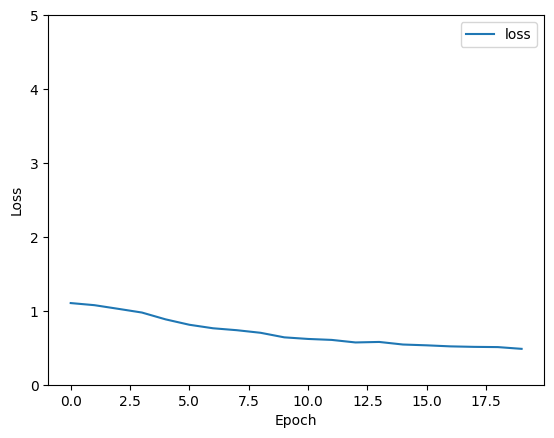

In [31]:
# Plot for Loss over n epochs

plt.plot(ann_history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 5.0])
plt.legend(loc='upper right')

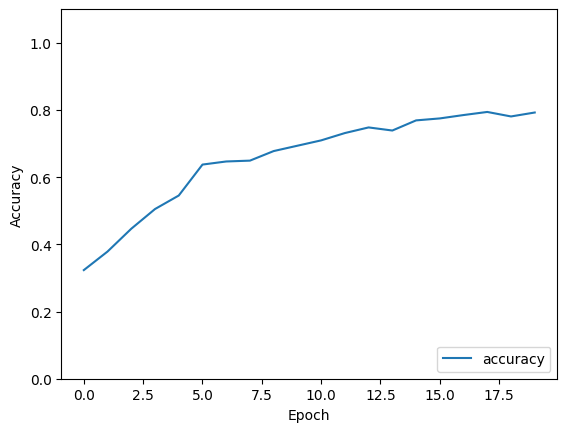

In [32]:
# Plot for Accuracy over n epochs

plt.plot(ann_history.history['sparse_categorical_accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')

In [33]:
# evaluation on testing data

loss_test, acc_test = ann_model.evaluate(X_test, Y_test_enc, verbose=2)

# predict probabilities
y_hat_enc = ann_model.predict(X_test, verbose=0)
y_hat_enc = np.argmax(y_hat_enc, axis=1)

# decode integers back to str categories
y_hat     = label_encoder.inverse_transform(y_hat_enc)

print("\nloss_test:", loss_test)
print("acc_test:", acc_test)

10/10 - 0s - loss: 0.8928 - sparse_categorical_accuracy: 0.7124 - 40ms/epoch - 4ms/step

loss_test: 0.8928089141845703
acc_test: 0.7123745679855347


In [34]:
cmd = compute_metrics(Y_test_enc, y_hat_enc)

~~~ Model Metrics ~~~          

Accuracy:	71.237 %          
Precision:	71.271 %          
Recall:		71.237 %          
F-1 Score:	71.219 %          

Confusion Matrix:
[[82  9 14]
 [15 61 20]
 [ 7 21 70]]          

Confusion Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       105
           1       0.67      0.64      0.65        96
           2       0.67      0.71      0.69        98

    accuracy                           0.71       299
   macro avg       0.71      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299



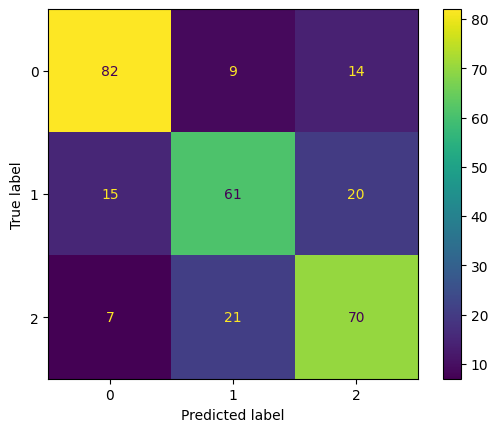

In [35]:
cmd.plot()

### Performance of Model 2: CNN

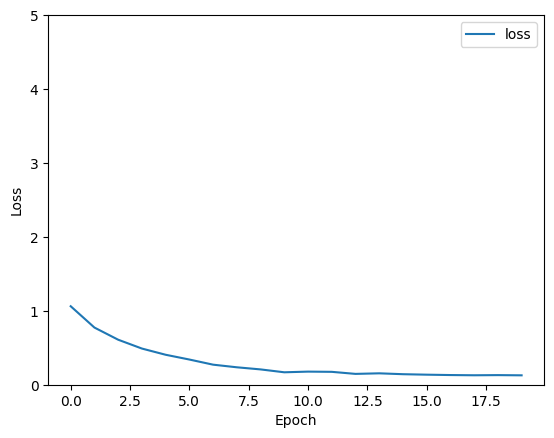

In [36]:
# Plot for Loss over n epochs

plt.plot(cnn_history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 5.0])
plt.legend(loc='upper right')

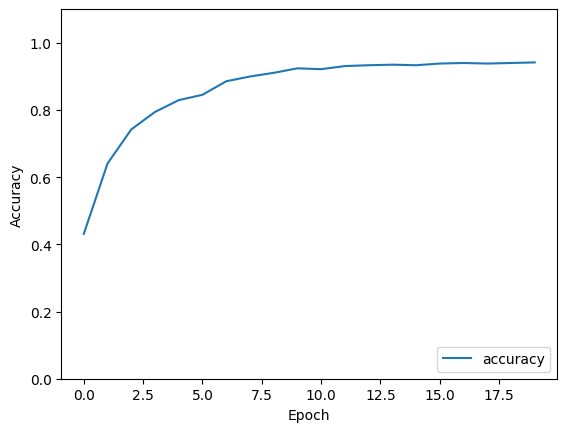

In [37]:
# Plot for Accuracy over n epochs

plt.plot(cnn_history.history['sparse_categorical_accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')

In [38]:
# evaluation on testing data

loss_test, acc_test = cnn_model.evaluate(X_test, Y_test_enc, verbose=2)

# predict probabilities
y_hat_enc = cnn_model.predict(X_test, verbose=0)
y_hat_enc = np.argmax(y_hat_enc, axis=1)

# decode integers back to str categories
y_hat     = label_encoder.inverse_transform(y_hat_enc)

print("\nloss_test:", loss_test)
print("acc_test:", acc_test)

10/10 - 0s - loss: 1.6946 - sparse_categorical_accuracy: 0.6856 - 266ms/epoch - 27ms/step

loss_test: 1.6945868730545044
acc_test: 0.6856187582015991


In [39]:
cmd = compute_metrics(Y_test_enc, y_hat_enc)

~~~ Model Metrics ~~~          

Accuracy:	68.562 %          
Precision:	68.655 %          
Recall:		68.562 %          
F-1 Score:	68.504 %          

Confusion Matrix:
[[79 12 14]
 [13 58 25]
 [14 16 68]]          

Confusion Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       105
           1       0.67      0.60      0.64        96
           2       0.64      0.69      0.66        98

    accuracy                           0.69       299
   macro avg       0.69      0.68      0.68       299
weighted avg       0.69      0.69      0.69       299



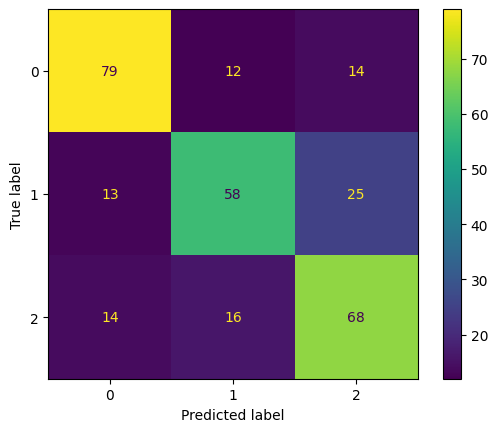

In [40]:
cmd.plot()

### Performance of Model 3: LSTM-RNN

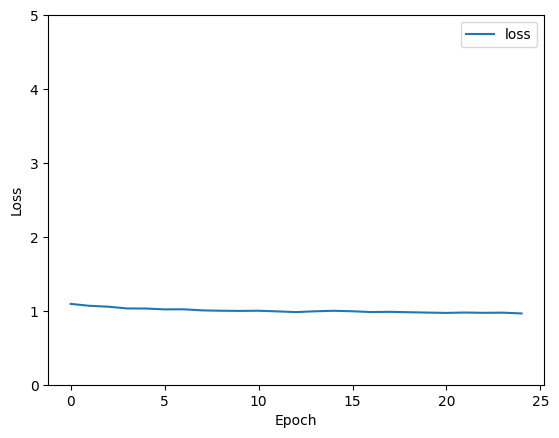

In [41]:
# Plot for Loss over n epochs

plt.plot(rnn_history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 5.0])
plt.legend(loc='upper right')

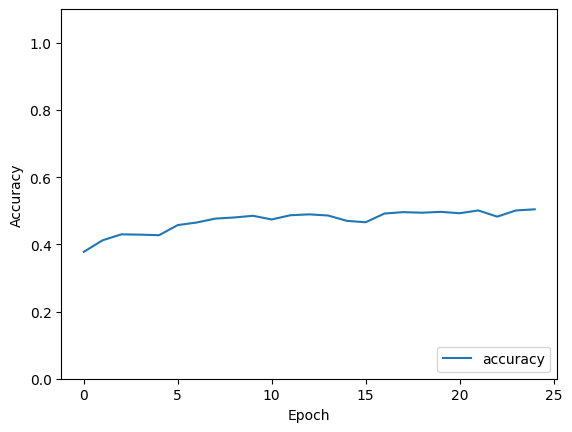

In [42]:
# Plot for Accuracy over n epochs

plt.plot(rnn_history.history['sparse_categorical_accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')

In [43]:
# evaluation on testing data

loss_test, acc_test = rnn_model.evaluate(X_test, Y_test_enc, verbose=2)

# predict probabilities
y_hat_enc = rnn_model.predict(X_test, verbose=0)
y_hat_enc = np.argmax(y_hat_enc, axis=1)

# decode integers back to str categories
y_hat     = label_encoder.inverse_transform(y_hat_enc)

print("\nloss_test:", loss_test)
print("acc_test:", acc_test)

10/10 - 1s - loss: 1.1542 - sparse_categorical_accuracy: 0.3512 - 1s/epoch - 138ms/step

loss_test: 1.154200792312622
acc_test: 0.3511705696582794


In [44]:
cmd = compute_metrics(Y_test_enc, y_hat_enc)

~~~ Model Metrics ~~~          

Accuracy:	35.117 %          
Precision:	34.281 %          
Recall:		35.117 %          
F-1 Score:	24.815 %          

Confusion Matrix:
[[15 87  3]
 [ 5 88  3]
 [15 81  2]]          

Confusion Report:
              precision    recall  f1-score   support

           0       0.43      0.14      0.21       105
           1       0.34      0.92      0.50        96
           2       0.25      0.02      0.04        98

    accuracy                           0.35       299
   macro avg       0.34      0.36      0.25       299
weighted avg       0.34      0.35      0.25       299



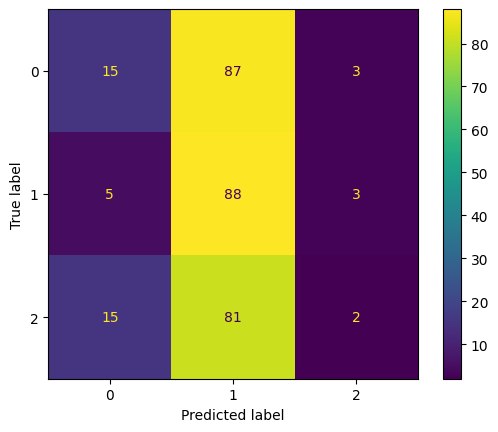

In [45]:
cmd.plot()

# 7. Conclusion

#### Review

The ANN model demonstrated a relatively balanced performance across precision, recall, and F1-score for each class. The confusion matrix for ANN showed that the model is performing well in distinguishing between classes, especially for the class 2: football and class 1: politics categories.

The CNN model also exhibited a good balanced performance, but the precision and recall for class 0 (science) are slightly lower than the other classes. The confusion matrix suggested some difficulty in correctly classifying science articles.

The LSTM model struggled significantly as evidenced by the low accuracy, precision and F1 scores. The confusion matrix also indicated notable misclassification across all classes overall.

#### Comparison

Comparison
The ANN model outperformed both CNN and LSTM-RNN models in terms of accuracy, precision, recall, and F1 score. It demonstrates a more balanced performance across all classes as proven by the Confusion matrix of ANN.

The CNN model performed reasonably well but seems to struggle with precision and recall for one of the labels, which is science (class 0).  This could indicate some challenges in extracting/filtering relevant features from the count-vectorized data which does not contain any semantic relationships.

The LSTM model performed poorly compared to ANN and CNN models. It had a low accuracy and F1 score, suggesting challenges in capturing meaningful patterns from the count vectorized data. This could be due to the factor that LSTM expects a somewhat sequential nature of data, which might not be well-suited for the provided representation vector. Also, the count-vectorized records miss out on the relative positioning and order of the words since they just tell the count of words present in the news article. Information such as semantic relationship and contextual position of the words could have helped the recurrent gates to understand the sequence and their relative importance better.

#### Remark

- Best Model: The ANN model was the best-performing model among the three, providing the highest accuracy and balanced performance across all metrics.



- Worst Model: The LSTM model performed the worst, with significantly lower accuracy. This may be due to challenges in capturing meaningful sequential patterns/semantics in the count vectorized data.

Given the count-vectorized data with three labels and the goal of text classification, it was expected that the models that would capture the semantic meaning of words and their relative interactions effectively, could be expected to perform well. I personally expected the ANNs and CNNs to do a better job. And as proven by the accuracy metrics and confusion matrices, the better models were indeed ANN and CNNs. LSTMs on the other hand are better designed for sequential data, and may not be the best choice here, as displayed by their poor performance.


Also, one significant limitation in the provided count-vectorized data is the absence of word position, which in-turn misses out on the contextual meaning of the words. Though embedding layer did constitute a part of the model, but since the count-vector data only provided the information of which words were present and how many times in an article, it might have limited/restricted the creation of meaningful embeddings during the training process and thus affecting LSTMs performance.


In a nutshell, the results proved out to be as expected.

---

X - X

---
---